In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [33]:
data = pd.read_csv('./Data/second_target.csv')
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,204,6283,4828,402,2286,2963,2673,1717,1068,16
1,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,11,825,1041,243,629,307,322,269,97,1
2,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,136,519,635,0,185,339,242,279,112,2
3,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,66,1778,2175,31,1505,1155,439,566,256,3
4,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,676,7523,9187,208,2471,4577,3857,2990,2609,4


In [34]:
target=data.iloc[:,:13]
feature=data[['시간대_06~11_매출_비율','연령대_20_매출_비율','점포수']]
feature.head()

target=pd.concat([target,feature],axis=1)

food=target[target['서비스_업종_코드_명'].isin(
       ['한식음식점', '중식음식점', '일식음식점', '양식음식점',
          '패스트푸드점', '분식전문점',
          '치킨전문점','제과점','호프-간이주점','커피-음료'])]

food.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수
0,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100001,한식음식점,316763168,2,15,16
1,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100002,중식음식점,39791852,0,33,1
2,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100003,일식음식점,60325474,0,8,2
3,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100004,양식음식점,199448496,0,28,3
4,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,CS100005,제과점,165688274,24,11,4


### 32개 있는 데이터만 고르기

In [35]:
food = food[food['점포수'] != 0]

In [36]:
food_count=food.pivot_table(index=['상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명'],aggfunc='size')
food_count=pd.DataFrame(food_count[food_count == 32]).reset_index()
code=zip(food_count['상권_코드'],food_count['서비스_업종_코드'])
food_temp = food[food[['상권_코드','서비스_업종_코드']].apply(tuple,1).isin(code)]
food_temp_count=food_temp.pivot_table(index=['상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명'],aggfunc='size')
sum(food_temp_count != 32)

0

In [37]:
food_temp['상권_구분_코드_명']

0          골목상권
3          골목상권
5          골목상권
6          골목상권
7          골목상권
           ... 
1218631    전통시장
1218632    전통시장
1218633    전통시장
1218634    전통시장
1218635    전통시장
Name: 상권_구분_코드_명, Length: 228128, dtype: object

In [38]:
# 일단 뺀거 저장하기
golmok=food[food['상권_구분_코드_명']=='골목상권']
golmok.to_csv('./Data/golmok.csv',index=False)

In [39]:
golmok.sort_values(by=['기준_년_코드','기준_분기_코드'],inplace=True)

### 서비스 업종별로의 분포 보기

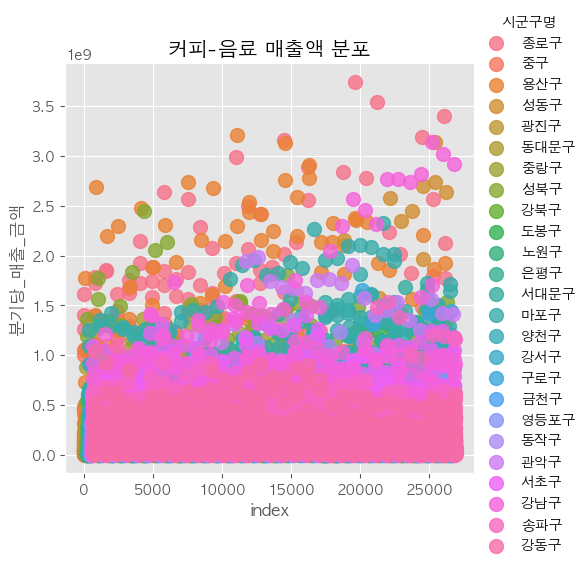

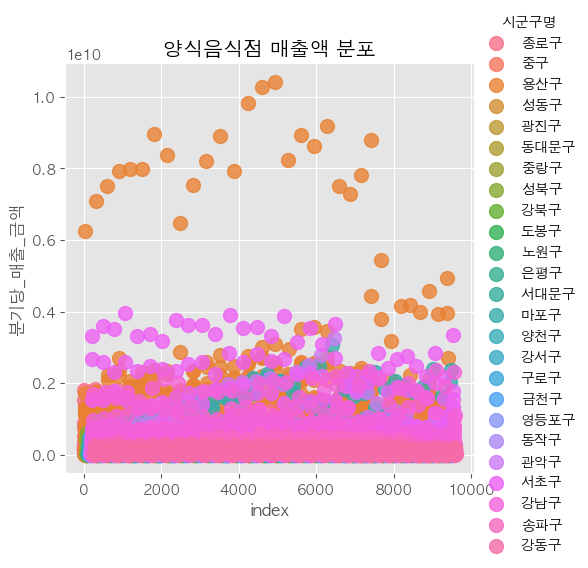

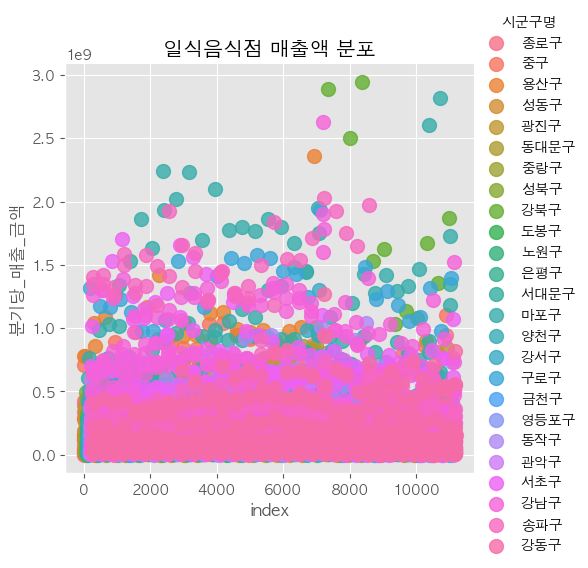

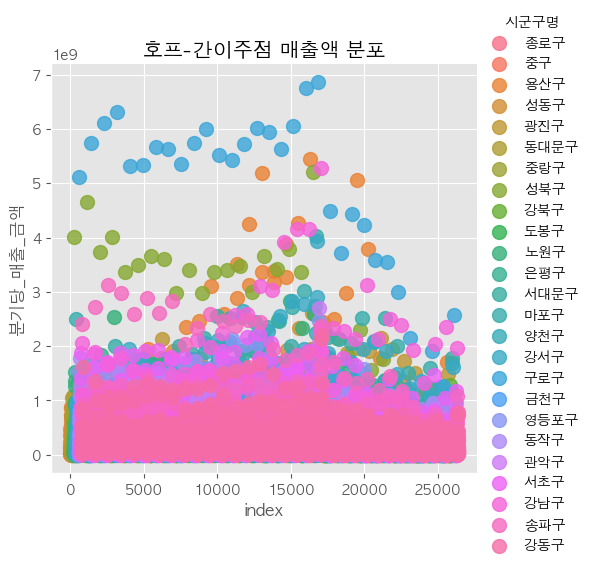

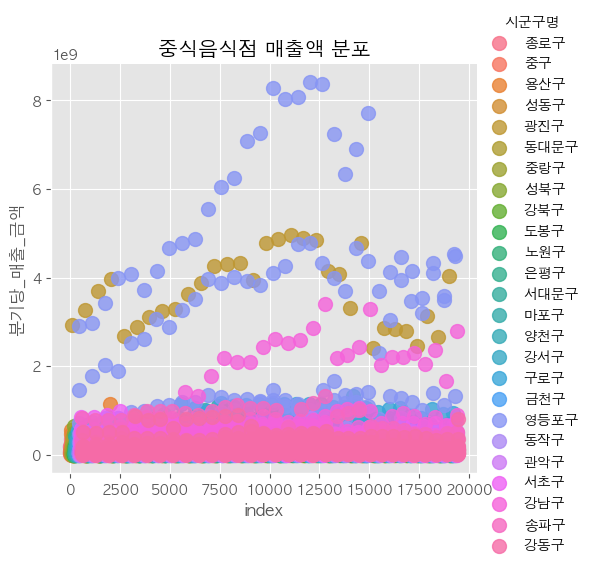

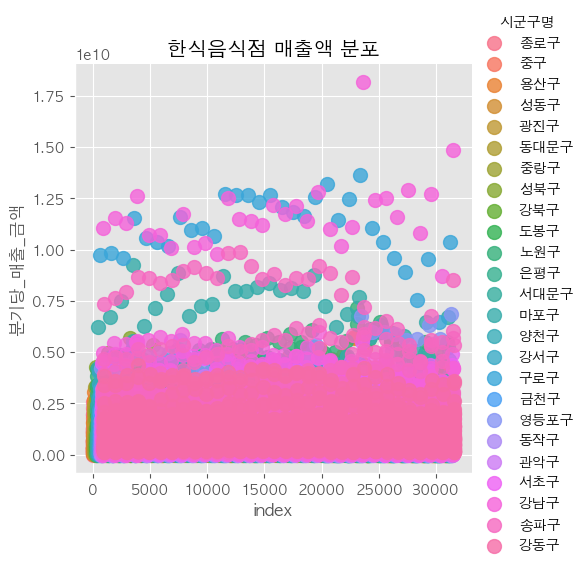

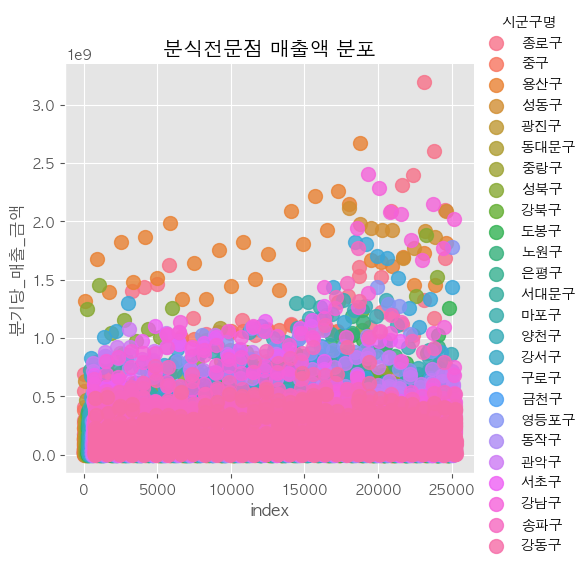

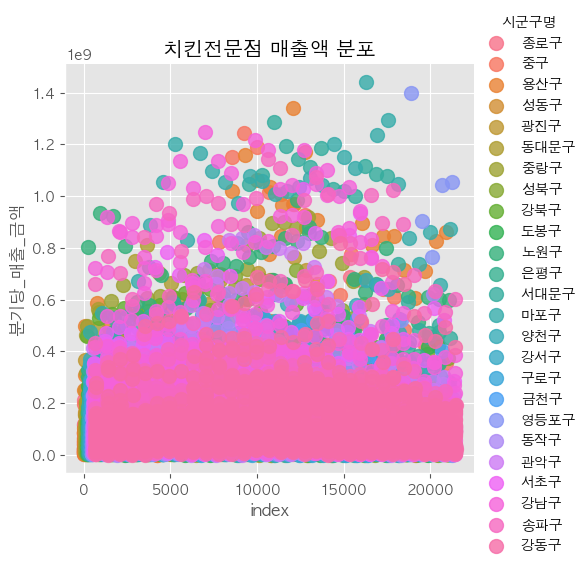

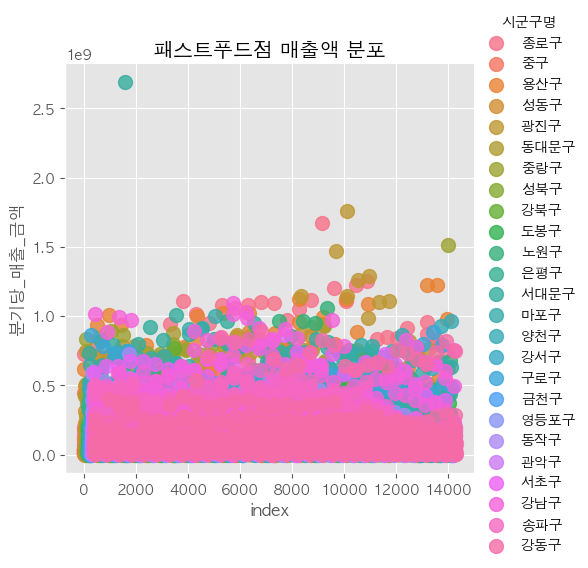

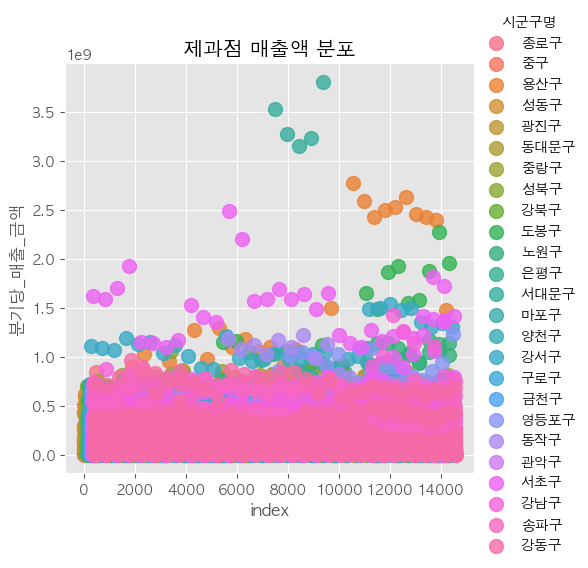

In [40]:
plt.style.use('ggplot')

for service in golmok['서비스_업종_코드_명'].unique():
    test=golmok[golmok['서비스_업종_코드_명'] == service]
    test.sort_values(by=['기준_년_코드','기준_분기_코드'],inplace=True)
    test.reset_index(inplace=True,drop=True)
    test.reset_index(inplace=True)

    sns.lmplot(
		x='index',
		y='분기당_매출_금액',
        data=test,
        fit_reg=False, # 회귀선 안나오게
        scatter_kws={'s':100}, # 좌표상의 점의 크기
        hue='시군구명'
    )

    plt.title(f'{service} 매출액 분포')

    plt.show()

### 추정치라 못믿겠어서 위아래 10%씩 자르고 해보기

In [41]:
from module.outlier import removeTen , thirtyTwo

golmok_test=removeTen(golmok,'분기당_매출_금액',10)
golmok_test=thirtyTwo(golmok_test)


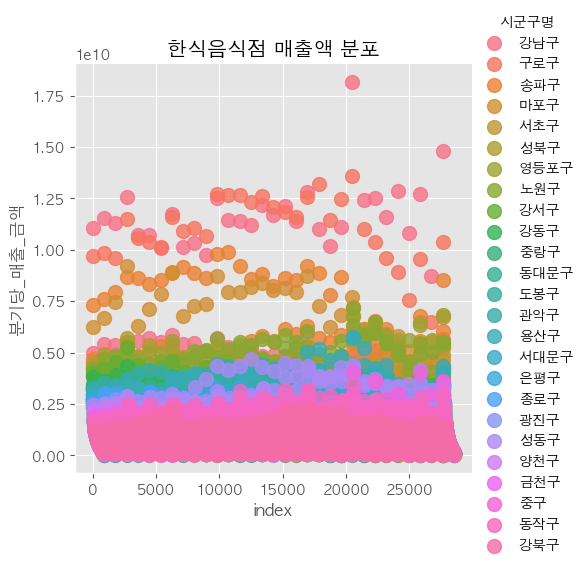

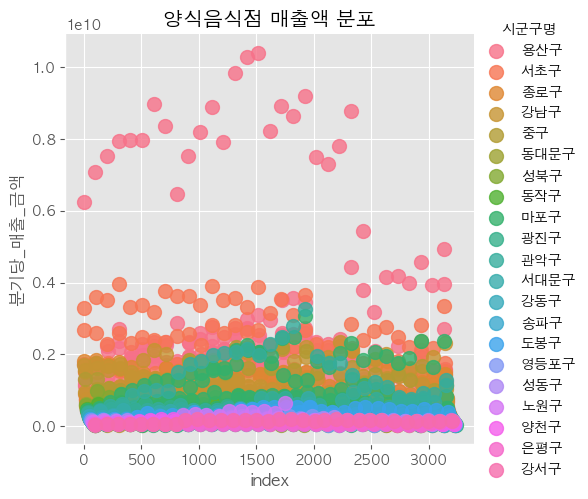

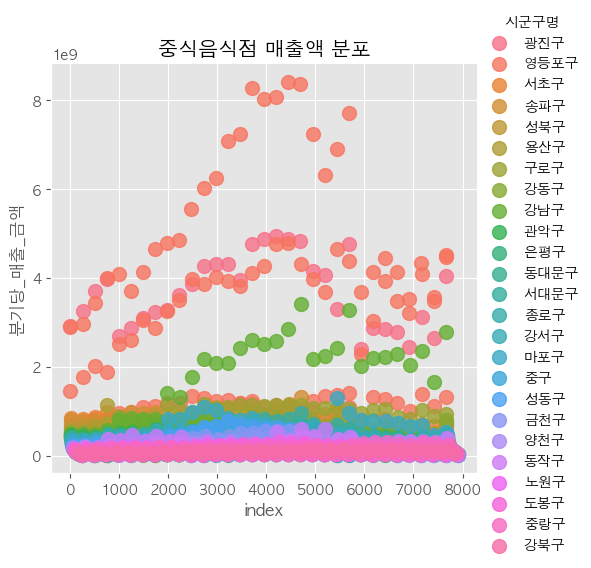

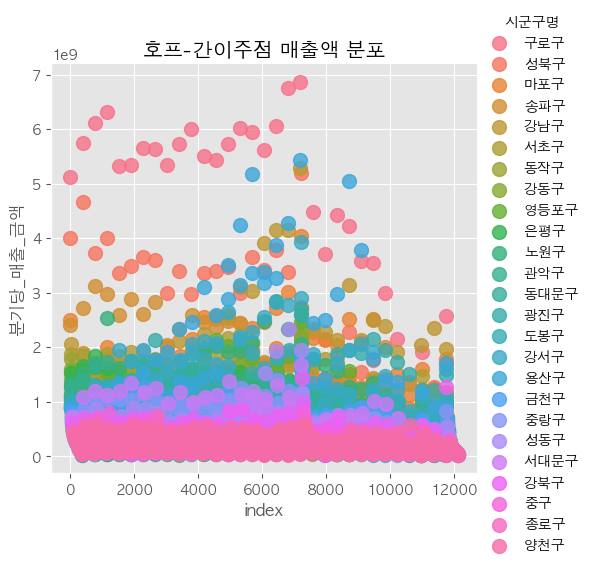

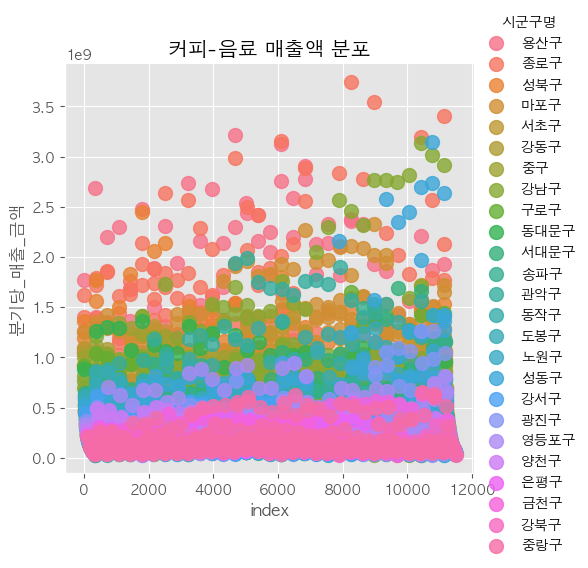

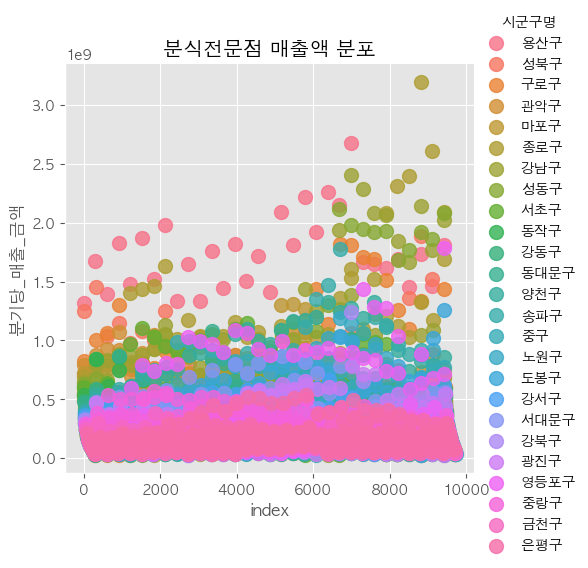

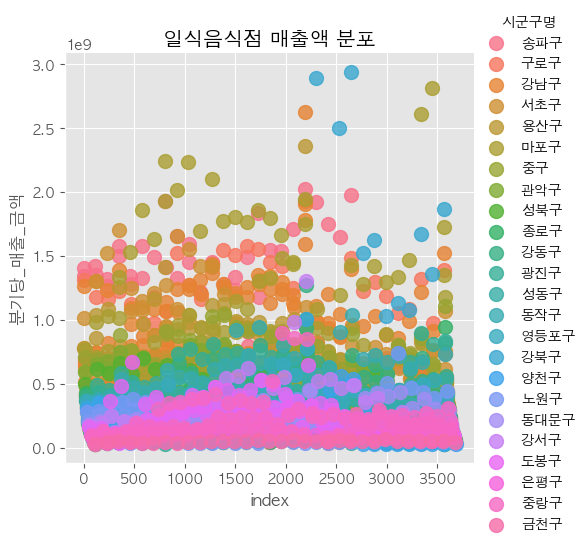

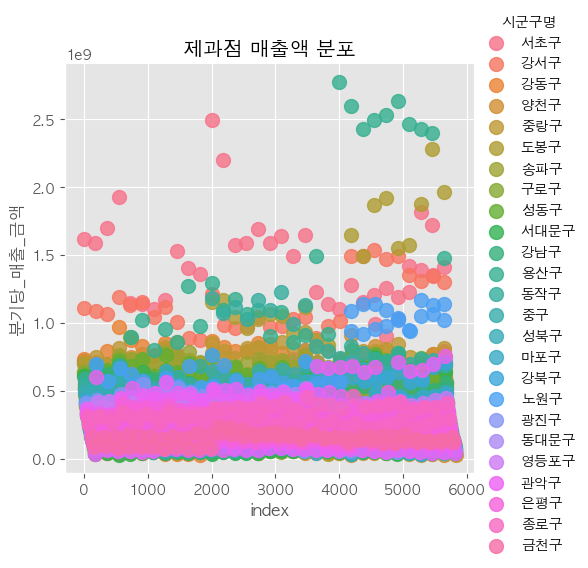

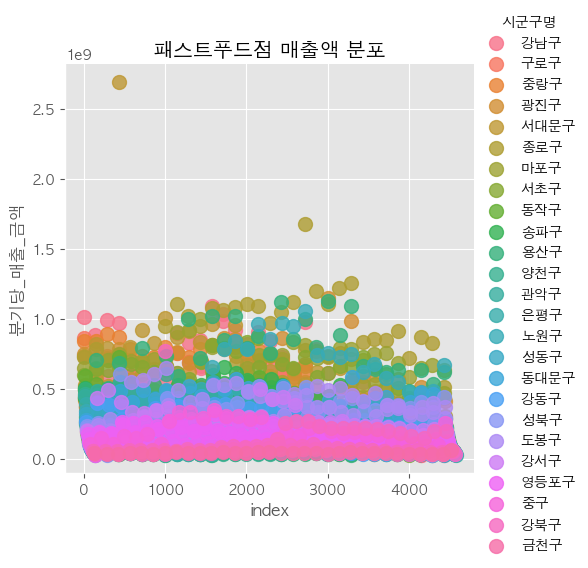

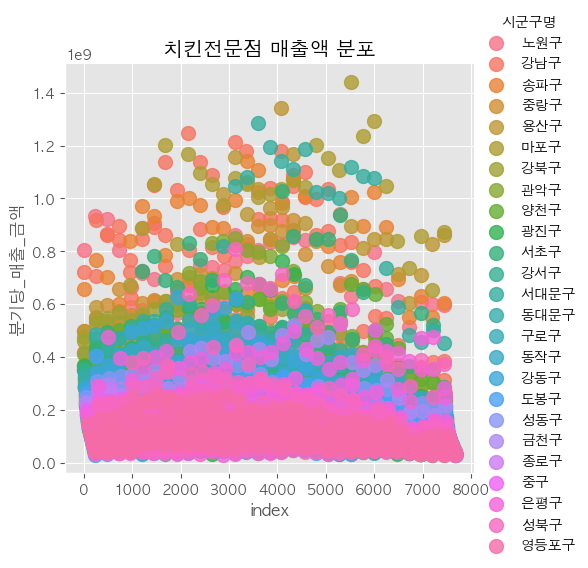

In [42]:
plt.style.use('ggplot')

for service in golmok_test['서비스_업종_코드_명'].unique():
    test=golmok_test[golmok_test['서비스_업종_코드_명'] == service]
    test.sort_values(by=['기준_년_코드','기준_분기_코드'],inplace=True)
    test.reset_index(inplace=True,drop=True)
    test.reset_index(inplace=True)

    sns.lmplot(
		x='index',
		y='분기당_매출_금액',
        data=test,
        fit_reg=False, # 회귀선 안나오게
        scatter_kws={'s':100}, # 좌표상의 점의 크기
        hue='시군구명'
    )

    plt.title(f'{service} 매출액 분포')

    plt.show()

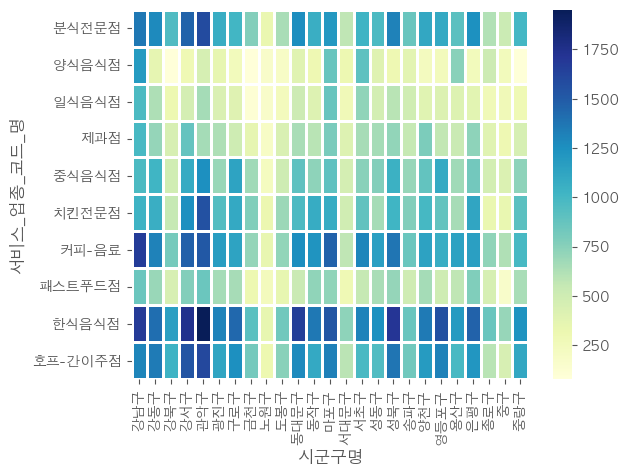

In [43]:
table=golmok.pivot_table(index=['시군구명'],columns=['서비스_업종_코드_명'],aggfunc='size')
sns.heatmap(
	table.T,
	fmt='d',
	cmap='YlGnBu',
	linewidth=2,
	cbar=True
)

plt.show()

In [44]:
table.apply((np.std,np.mean),axis=1).sort_values(by='mean',ascending=False)

,std,mean
시군구명,,
관악구,512.273321,1208.8
강남구,295.570710,1202.6
강서구,482.891764,1095.7
마포구,287.534732,1077.0
성북구,434.624538,1016.4
강동구,364.165423,983.3
동대문구,418.181035,941.6
은평구,393.035820,917.4
서초구,254.003937,908.0


### 역시나 구별로 봐도 데이터의 분포가 다르다. 그렇기 때문에 데이터 수가 많고 ,업종별로 고르게 데이터가 있는 강남구 아니면 마포구 둘중 강남구를 선택하겠다.